In [141]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import time

# Ising model energy function

In [142]:
def E(s):
    E=0
    for i in range(len(s)-1):
        E += -s[i]*s[i+1]
    return(E)

# Single flip Metropolis algorithm for Ising model 
N_chain is the number of chains

M is the length of Markov chains

N is the length of the 1D-Ising chain

beta is the inverse temperature

In [143]:
def MC_ising(N_chain,M,N,beta):
    import time

    #initiate configurations for N_chain Markov chains
    s=2*np.random.binomial(1, 0.5, (N_chain,N))-1 

    List_m = [] # List of Magnetization of each chain at time t
    a=[0]*N_chain # Counting Accepted trials

    #loop
    start = time.time()
    
    for t in range(M):  # trial t 
        m_t=[] # magnetization at time t
        for j in range(N_chain): # the j-th chain
            # trial 
            spin_flip=int(N*np.random.rand()) # index of the chosen spin
            s_trial=copy.deepcopy(s[j])
            s_trial[spin_flip]=-s_trial[spin_flip] # trial configuration by single flip
            # acception
            r=np.random.rand()
            if np.exp(-beta*(E(s_trial)-E(s[j]))) > r: # accepted
                s[j] = s_trial
                a[j] += 1
            m_t.append(sum(s[j])/N) # magnetization of the j-th chain at time t
        List_m.append(m_t)
        
    end = time.time()
    
    time = end-start
    AcceptedRate = sum(a)/(M*N_chain)

    m_tot=[m for m_t in List_m for m in m_t] # flatten all the magnetization
    
    m_reduced = [np.mean(m_tot[50*i:50*i+49]) for i in range(int(len(m_tot)/50))] # Take 50 as the length of a group, larger than the decorrelation length
    expect_m = np.mean(m_reduced)
    error_m = np.var(m_reduced)


    return(expect_m, error_m, time, AcceptedRate)

# Hyperparameters

In [150]:
# length of a Markov chain
M = 20000
# length of the Ising model
N = 40
# inverse temperature
beta = 0.8
# number of chains
LN_chain = [10,14,18,20,24,28,30,32,36,40,44,48,52,56,60,64,68,72,76,80,90,100]#np.arange(10,100,2)#
print('LN_chain =',LN_chain)

LN_chain = [10, 14, 18, 20, 24, 28, 30, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 90, 100]


In [151]:
Lm_expect=[]
Lm_error=[]
Ltime = []
Leff = []
Lacc = []

for N_chain in LN_chain:
    print('calculating N_chain=',N_chain)
    expect_m,error_m,time,AcceptedRate = MC_ising(N_chain,M,N,beta)
    Lm_expect.append(expect_m)
    Lm_error.append(error_m)
    Ltime.append(time)
    Lacc.append(AcceptedRate)
    Leff.append(1/(time*error_m**2))

print('Complete!')

calculating N_chain= 10
calculating N_chain= 14
calculating N_chain= 18
calculating N_chain= 20
calculating N_chain= 24
calculating N_chain= 28
calculating N_chain= 30
calculating N_chain= 32
calculating N_chain= 36
calculating N_chain= 40
calculating N_chain= 44
calculating N_chain= 48
calculating N_chain= 52
calculating N_chain= 56
calculating N_chain= 60
calculating N_chain= 64
calculating N_chain= 68
calculating N_chain= 72
calculating N_chain= 76
calculating N_chain= 80
calculating N_chain= 90
calculating N_chain= 100
Complete!


# Magetization and its error 

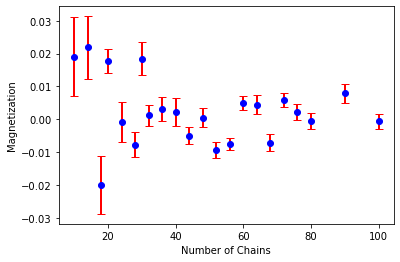

In [152]:
plt.errorbar(LN_chain, Lm_expect, yerr=Lm_error,fmt='o',ecolor='r',color='b',elinewidth=2,capsize=4)
plt.ylabel('Magnetization')
plt.xlabel('Number of Chains')
plt.show()

# Acception rate

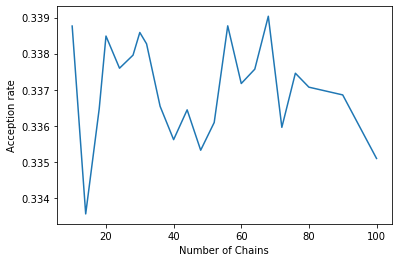

0.3370316403229452


In [153]:
plt.plot(LN_chain,Lacc)
plt.ylabel('Acception rate')
plt.xlabel('Number of Chains')
plt.show()
print(np.mean(Lacc))

# Effeciency of different Number of Markov chains
Effeciency = $\frac{T}{\sigma^2}$, where T is the run time, $\sigma$ is the variance

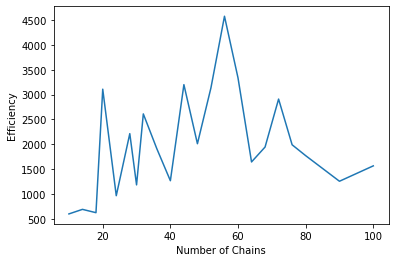

In [154]:
Leff = [1/(Ltime[i]*Lm_error[i]*Lm_error[i]) for i in range(len(LN_chain))]
plt.plot(LN_chain,Leff)
plt.ylabel('Efficiency')
plt.xlabel('Number of Chains')
plt.show()

# Run time T

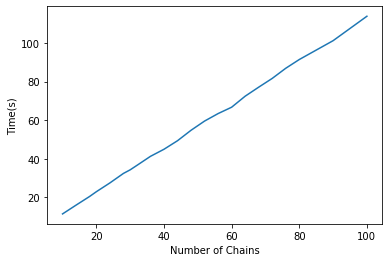

In [155]:
plt.plot(LN_chain,Ltime)
plt.ylabel('Time(s)')
plt.xlabel('Number of Chains')
plt.show()

# Variance as function of N_chain

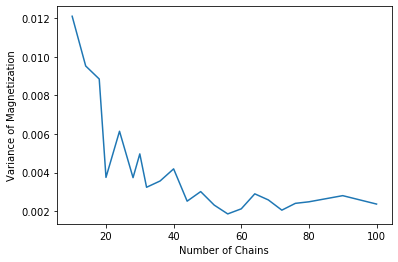

In [156]:
plt.plot(LN_chain,Lm_error)
plt.ylabel('Variance of Magnetization')
plt.xlabel('Number of Chains')
plt.show()